In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 30.5 MB/s eta 0:00:00


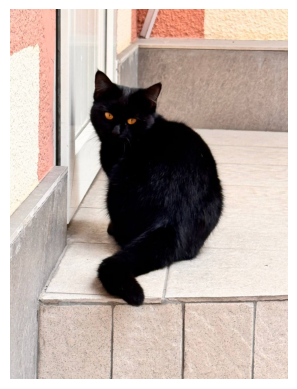

In [42]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "cat3.JPG"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


0: 640x640 1 cat, 4832.3ms
Speed: 0.0ms preprocess, 4832.3ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)


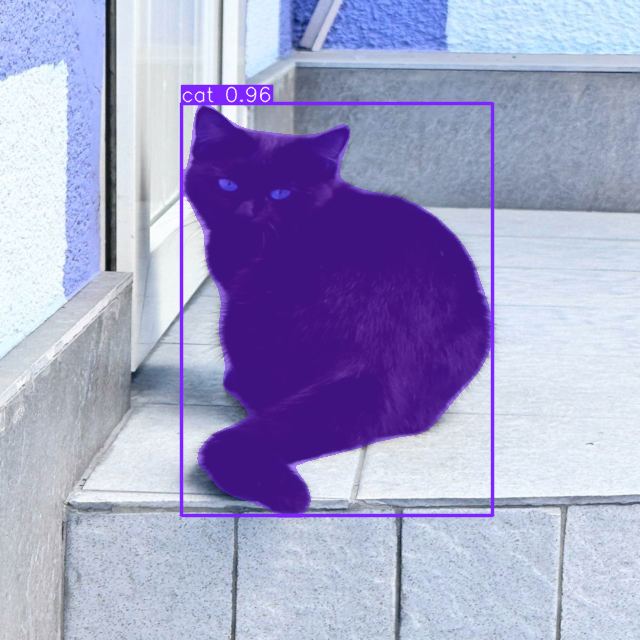

In [44]:
from ultralytics import YOLO
import torchvision.transforms as transforms

# Transform image to be square with dimensions divisible by 32
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Adjusting to a 256x256 square
    transforms.ToTensor()
])

img_tensor = transform(image)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension to make it (1, 3, 640, 640)

# Load the pretrained YOLO model
model = YOLO("yolo11x-seg.pt")  # YOLO model trained on ImageNet

# Predict with the model on the transformed image
results = model(img_tensor)

for result in results:
    result.show()  # display to screen